# Titanic Project



Problem Statement:




The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 





Note: You can find the dataset in the link below.





Downlaod Files:



https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [4]:
import pandas as pd

In [5]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Lets check the shape of the datase
data.shape

(891, 12)

So , Here we have 891 Rows and 12 Columns

# Data is Duplicated ?

In [7]:
data.duplicated().sum()

0

So, Here we dont any duplicate value . We are good to proceed.`

In [8]:
#Lets check datatype of dataset
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

So , Here we can see that. We have ,

Integer - PassengerId,Survived,Pclass,SibSp,Parch



Float - Age,Fare


Object - Name,Sex ,Ticket,Cabin,Embarked



Our tager column is integer data type

In [9]:
#Lets check for nan values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have Nan Values in ,


Age- 177 Nan


Cabin- 687 Nan



Embarked- 2 Nan


Lets check unique values for getting information to which method use to fill the Nan

In [10]:
#Lets check unique values
data['Survived'].unique()

array([0, 1], dtype=int64)

In Survived Columns We have 2 Elements

0 - Die

1- Survived

In [11]:
#Check all unique codes values in one code with lambda
print(data.apply(lambda col:col.unique()))

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Survived                                                  [0, 1]
Pclass                                                 [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex                                               [male, female]
Age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                      [1, 0, 3, 4, 2, 5, 8]
Parch                                      [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Cabin          [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked                                          [S, C, Q, nan]
dtype: object


In [12]:
#Lets fill Nan Age
data['Age']=data['Age'].fillna(data['Age'].mean())

In [13]:
#Lets Fill Cabin Nan
data['Cabin']=data['Cabin'].fillna(method='bfill')

In [14]:
#Lets fill Embarked
data['Embarked']=data['Embarked'].fillna(method='pad')

Here we filled all Nan values with pad method..

In [15]:
#Lets check NULL values
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

So ,Now we dont have anu null values and we are good to proceed.

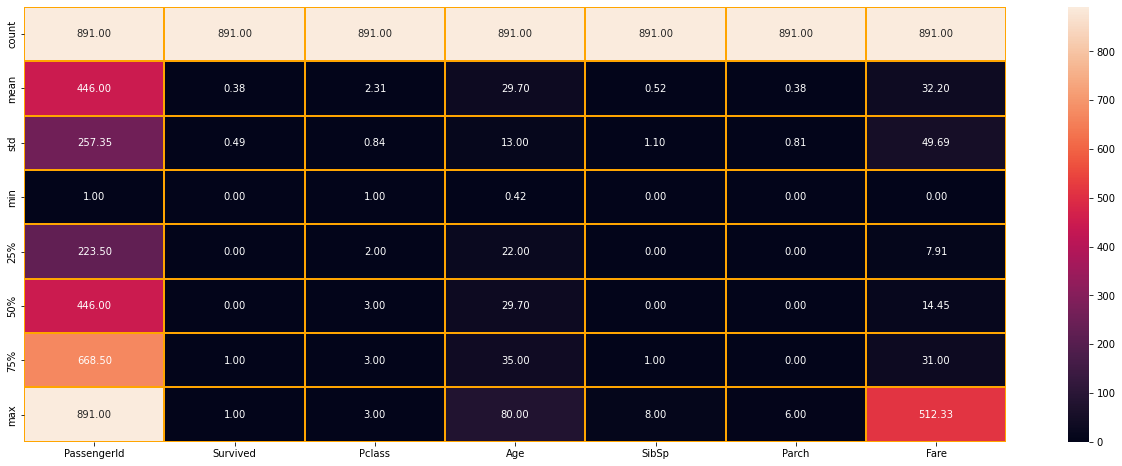

In [16]:
#Lets describe the dataset with some colors
#Lets Discribe the dataset using heatmap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(22,8))
sns.heatmap(data.describe(),annot=True,linewidths=0.3,linecolor='orange',fmt="0.2f")
plt.show()

# OBSERVATIOS

- We dont have any null values .

- We see that Some outliers in Fare


# In my POV 2 Colums are Unnecessory

- Name

- Passenger ID 

Both are just for name shake ( Nominal Data)

In [17]:
#Lets delete Name and Passenger ID
data.drop(columns=['Name','PassengerId'],inplace=True)

In [18]:
#Now lest How dataset is Looking
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,C85,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,E46,S


So, Here we can deleted 2 columns 

# EDA (Exploratory data analysis)
Basic Analysis with Visualisation

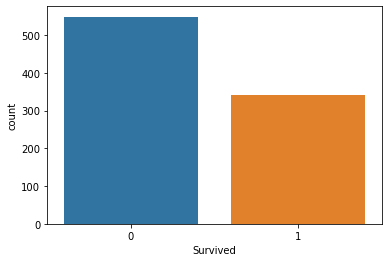

0    549
1    342
Name: Survived, dtype: int64


In [19]:
#Lets do with countplot and see How many people survived and die
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived',data=data)
plt.show()
print(data['Survived'].value_counts())

So , Here we can see that 549 People are Survived and 342 people are die .,
and its not a imbalanced dataset

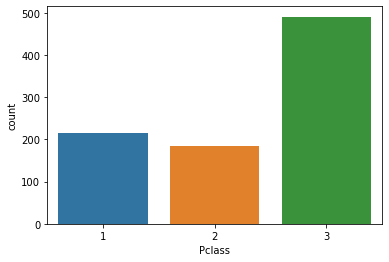

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
#Lets plot PCLass and check how many people in which clas
sns.countplot(x='Pclass',data=data)
plt.show()
data['Pclass'].value_counts()

So, Here we can see that 491 peoples in 491

216 peoples in 1 class


184 people in 184

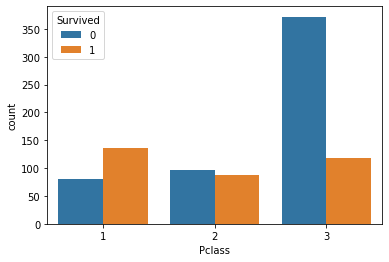

In [21]:
#Lets check how many people die from which class
sns.countplot(x='Pclass',data=data,hue='Survived')
plt.show()

Here we can see that Most of people die from PClass 3 almost more then 125 Peoples


and in PCLass 2 almost 100 people are die.


and in PCLass 1 almost 70 peoples are die .(Based on countplot)

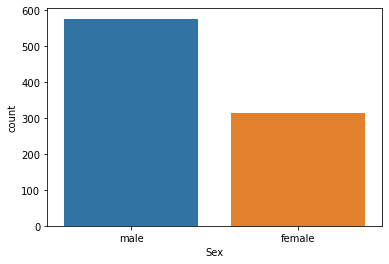

male      577
female    314
Name: Sex, dtype: int64

In [22]:
#Lets plot How many male and female in the ship
sns.countplot(x='Sex',data=data)
plt.show()
data['Sex'].value_counts()

Total MALE and FEMALE

MALE - 577

FEMALE - 314

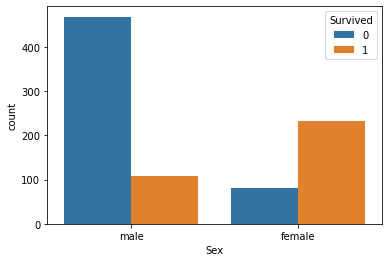

In [23]:
#Lets check how many male and female are die
sns.countplot(x='Sex',data=data,hue='Survived')
plt.show()

Here we can see that,

Almost 100 Male are Die


Almost more the 200 Female are die.

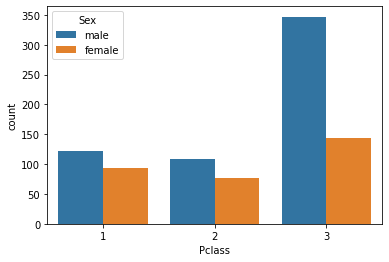

In [24]:
#Lets check How many male and female sitting in which PClass
sns.countplot(x='Pclass',data=data,hue='Sex')
plt.show()

Here we can see that .

In Pclass 1 - Male are more the 125 Peoples
             
             
             
             Female are almost 90.
             
             
In Pclass 2 - Male are almost 120 People
              
              
              Female are almost 70 People
              

In Pclass 3 -  Male are more the 340 People
              
              
              Female are almost 140

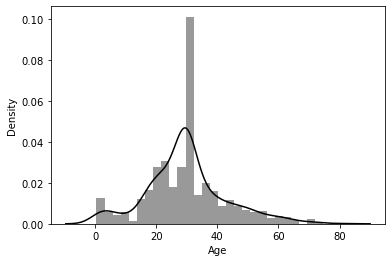

In [25]:
import warnings
warnings.filterwarnings('ignore')
#Lets plot Distplot for age
sns.distplot(data['Age'],kde=True,color='black')
plt.show()

So, Here we can see that our data is distributed normally and we dont think there is a outliers

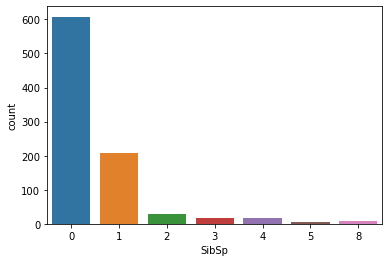

In [26]:
#Lets plot SibSp
sns.countplot(x='SibSp',data=data)
plt.show()

We can see that . we 

Who have 0 Siblings - There are more then 590 peoples


Who have 1 Siblings - Allmost 200 People


Who have 2 Siblings - Almost 30 People


Who have 3 Sibling - Almost 20 People



Who have 4 Sibling - Almost 20 People



Who have 5 Siblings - Almost 9-10 People


and Who have 8 Siblings - Almost 15-20 Peoples

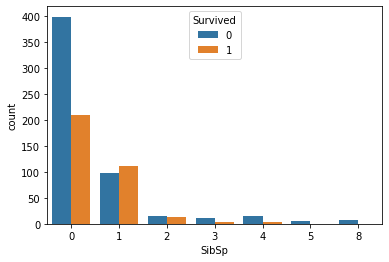

In [27]:
#Lets check SibSp with Survived
sns.countplot(x='SibSp',data=data,hue='Survived')
plt.show()

Here we can see that.

Who have 0 Siblings - There are almost 210 People die


Who have 1 Sibling - There are almost 120 People die


Who have 2 Sibling - There are almost 14 people die 


Who have 3 Sibling - There are almost 5 People die


Who have 4 Sibling - There almost 5 People die


Who have 5 Sibling - No people can die


Who have 8 Sibling - No people can die

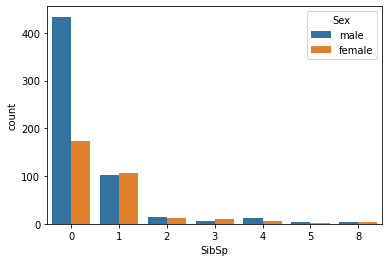

In [28]:
#Lets plot SibSp with Sex
sns.countplot(x='SibSp',data=data,hue='Sex')
plt.show()

Here we can see that.

Who have 0 Siblings -almost 400 People are Male 
                      
                  almost 180 people are Female
    
    
    
Who have 1 Sibling -almost 100 People are MALE
                     
                  almost  110 People are Female
        
        

Who have 2 Sibling -almost 10 People are MALE
                     
                    almost 15 People are Female



Who have 3 Sibling - almost 5 People are MALE
                     
                  almost  10 People are Female




Who have 4 Sibling -almost 15 People are MALE
                     
                    almost 10 People are Female




Who have 5 Sibling -almost 10 People are MALE
                     
                   almost 5 People are Female







Who have 8 Sibling -almost 5 People are MALE
                     
                   almost 5 People are Female

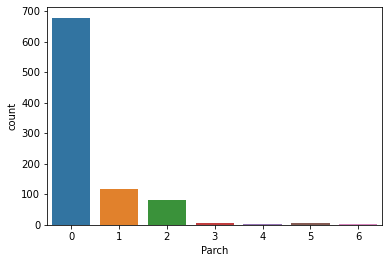

In [29]:
#Lets plot Parch
sns.countplot(x='Parch',data=data)
plt.show()

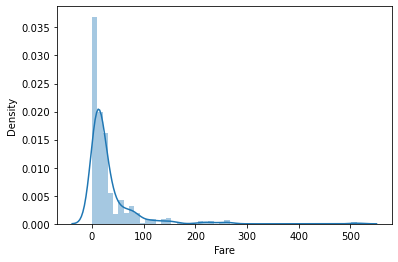

In [30]:
#Lets plot dist plot dist plot for fare
sns.distplot(data['Fare'])
plt.show()

We can see that there are some outliers .

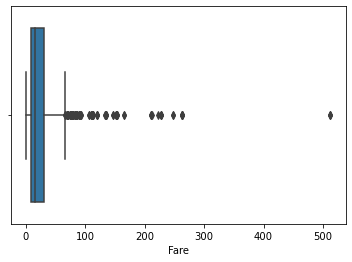

In [31]:
#Lets plot same thing in box plot and check how many outliers in fare columns
sns.boxplot(data['Fare'])
plt.show()

So , Here we confirm  we have outliers  . We have to treat them. but not now .

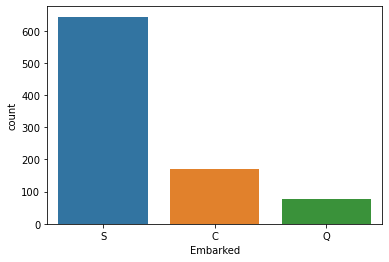

In [32]:
# lets plot Embarked
sns.countplot(x='Embarked',data=data)
plt.show()

So in this plot we can see that . maximum people embarked from S - More then 600

from C more then 150 People


from Q almost 80 peoples are embarked

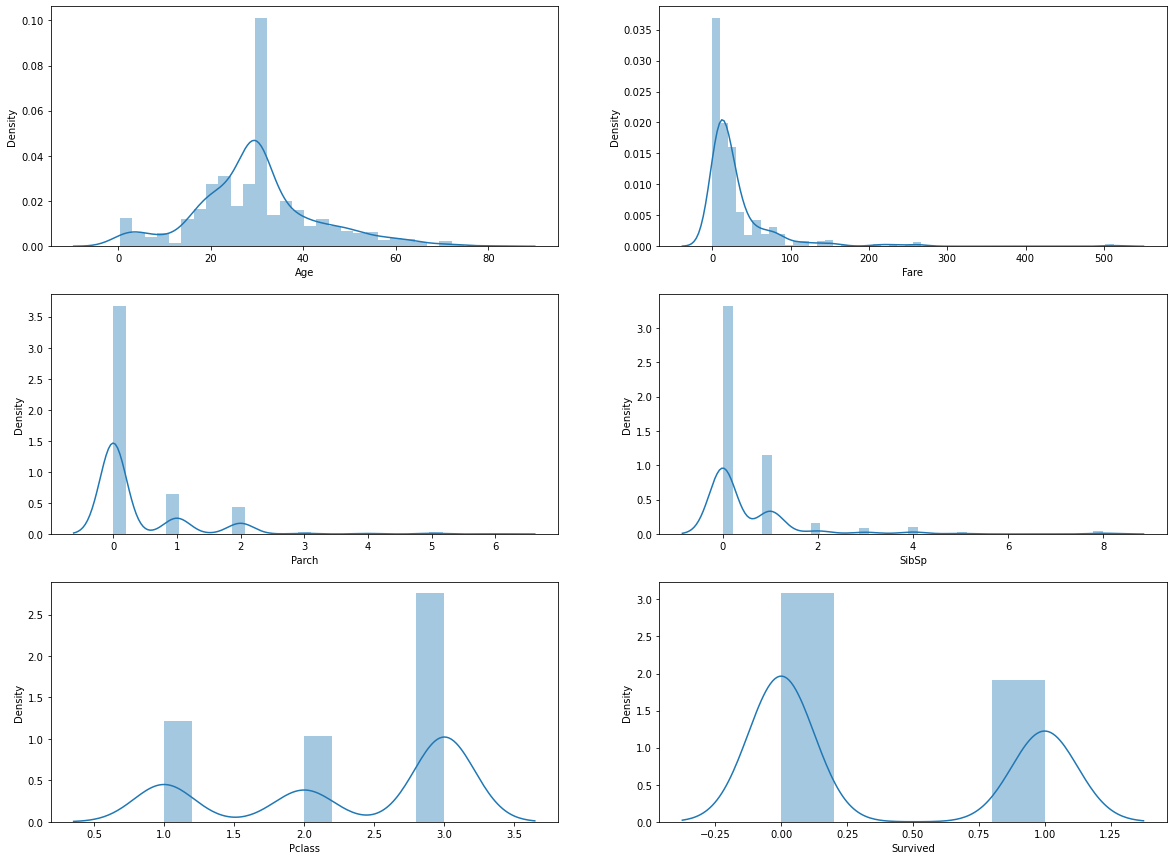

In [34]:
#Lets check dist plot for all columns
plt.figure(figsize=(20,15))
plotnumber=1
for col in data[['Age','Fare','Parch','SibSp','Pclass','Survived']]:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col)
    plotnumber +=1
plt.show()
        

We can see that all the data is distributed normally .

But fare have some outliers . but we not confirm now.

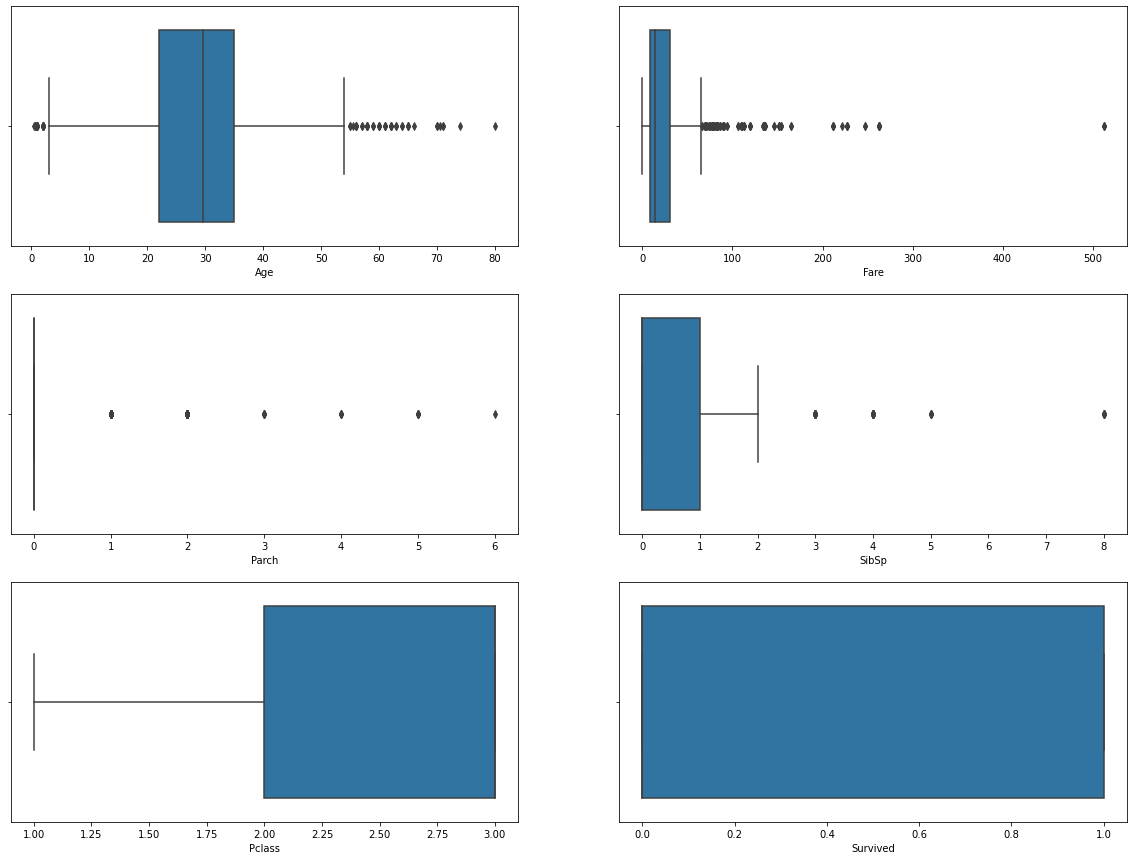

In [35]:
#Lets plot box plot
#Lets check dist plot for all columns
plt.figure(figsize=(20,15))
plotnumber=1
for col in data[['Age','Fare','Parch','SibSp','Pclass','Survived']]:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(data[col])
        plt.xlabel(col)
    plotnumber +=1
plt.show()
        

So ,we can see that we only take fare in outlier . 

 In age column its also show the ouliers because we dont take as outlier beacuse 80 year people is not a new thing .
 
 and in Sibling they show us outlier . but we dont consider as a outlier because titanic tragedy is done in before 1912 so before 1912 lots of parents have 8 child . 
 
 
 
 
 So here we observed . we have onlye one column which have outliers. and the column name is Fare

# First we have to check correlatiom before losing any data because we have small dataset

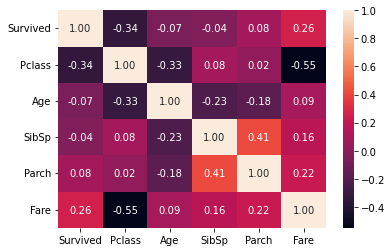

In [36]:
sns.heatmap(data.corr(),annot=True,fmt='.2f',)
plt.show()

# Observation 


Fare have 26 % relation with Survived

Parch have 8% relation with survived

Sibsp have 4% relation with Survived


Age have 7% relation with Survivived


Pclass have 34% relation with Survived




and we can also see that 


Pclass and Fare has a 55 % relation


Survived and Fare has a 26% relation

(Might be there are multicollinearity problem we will check)

In [37]:
#Lets check correlation with target columns
data.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

Almost same thing we observed in above code.

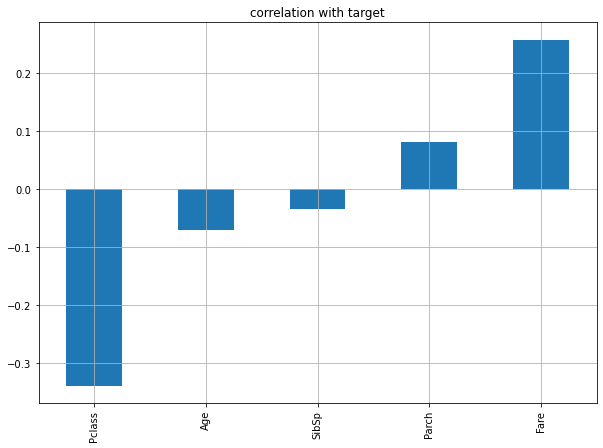

In [38]:
#Visualize the correlation
data.drop('Survived',axis=1).corrwith(data.Survived).plot(kind='bar',grid=True,figsize=(10,7),title='correlation with target')
plt.show()

Here we can see that we have good relationship with Pclass and Fare 

# Data Preprocessing

In [39]:
#Lets use encoding technique and convert all categorical data to numerical data
#First filter categorical column
numeric=['int8','int16','int32','int64','float','float32','float64']
categorical_column=[]
feature=data.columns.values.tolist()

for col in feature:
    if data[col].dtype in numeric:
        continue
    categorical_column.append(col)
categorical_column

['Sex', 'Ticket', 'Cabin', 'Embarked']

So here now we can get 4 Categorical Columns . We have Encode them.

In [40]:
#Lets encode by get dummies method and enode them
df1=pd.get_dummies(data[['Sex','Ticket','Cabin','Embarked']],drop_first=True)
df1

,Sex_male,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


 So , here we can encode the categorical column to numbers.

In [41]:
#Lets join this .
data=data.join(df1)

In [42]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,C85,S,...,0,0,0,0,0,0,0,0,0,1
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,...,0,0,0,0,0,0,0,0,0,0
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,C123,S,...,0,0,0,0,0,0,0,0,0,1
3,1,1,female,35.000000,1,0,113803,53.1000,C123,S,...,0,0,0,0,0,0,0,0,0,1
4,0,3,male,35.000000,0,0,373450,8.0500,E46,S,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,B42,S,...,0,0,0,0,0,0,0,0,0,1
887,1,1,female,19.000000,0,0,112053,30.0000,B42,S,...,0,0,0,0,0,0,0,0,0,1
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,C148,S,...,0,0,0,0,0,0,0,0,0,1
889,1,1,male,26.000000,0,0,111369,30.0000,C148,C,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#Lets delete Categorical Columns
data.drop(columns=categorical_column,inplace=True)

In [44]:
#Lets check is deleted or not 
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Ticket_110413,Ticket_110465,Ticket_110564,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Lets Handle the Outlies By using Zscore

We see above, only Fare column contains outliers .lets check again

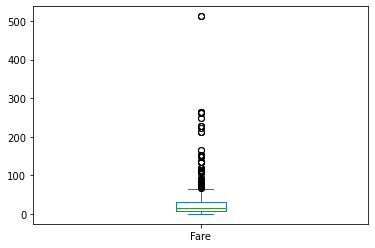

In [45]:
#Lets plot agian BMI
data['Fare'].plot.box()
plt.show()

we can . Clearly see that there is outliers we have to treat that. using zscore

In [46]:
data.shape

(891, 835)

In [47]:
#Lets import zscore
import numpy as np
from scipy.stats import zscore
z_score=zscore(data[['Fare']])
abs_score=np.abs(z_score)
filtering_entry=(abs_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Ticket_110413,Ticket_110465,Ticket_110564,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,...,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,0.376579,2.338691,29.668789,0.517796,0.366246,26.530170,0.653272,0.003444,0.002296,0.001148,...,0.001148,0.013777,0.020666,0.010333,0.004592,0.017222,0.020666,0.002296,0.089552,0.730195
std,0.484806,0.821469,13.024141,1.101448,0.792325,29.351184,0.476202,0.058621,0.047891,0.033884,...,0.033884,0.116632,0.142345,0.101183,0.067650,0.130171,0.142345,0.047891,0.285703,0.444113
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,13.862500,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
data.shape

(871, 835)

# Check How Much Data Loss

In [49]:
data_loss=((891-871)/891)*100
data_loss

2.244668911335578

So here we loss 2% data

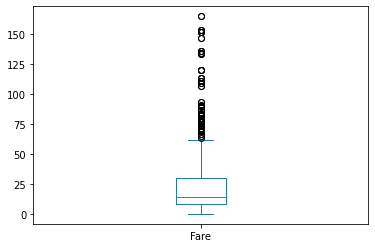

In [50]:
#Lets plot agian Fare
data['Fare'].plot.box()
plt.show()

So here we can see that we deleted 20 records from our bmi

# Dividing data in feature and vectors

In [51]:
x=data.drop(columns='Survived')#Feature
y=data.Survived#Target

# Now use Feature Selection Techniue

SelectPercentile

In [52]:
from sklearn.feature_selection import SelectPercentile,chi2
spercentile =SelectPercentile(score_func=chi2,percentile=80)


spercentile=spercentile.fit(x,y)

In [53]:
#Separate the features to check p values 

cols=spercentile.get_support(indices=True)#to return index number instead of boolean
print('Feature Index = ',cols)

feature =x.columns[cols]

print('feature = ',list(feature))

Feature Index =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36
  37  38  39  40  43  44  45  46  47  49  50  51  53  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  98
  99 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 138 139 140 141 142 143 144 145 148 149 150 151 152 153 154 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 246 247 248 249 250 251
 253 254 255 256 258 259 260 261 2

In [54]:
df_scores=pd.DataFrame({'feature':x.columns,'chi2score':spercentile.scores_,'pvalue':spercentile.pvalues_})
df_scores.sort_values(by='chi2score',ascending=False)

,feature,chi2score,pvalue
4,Fare,2520.100722,0.000000e+00
5,Sex_male,86.145628,1.671611e-20
0,Pclass,27.218996,1.816650e-07
1,Age,25.632072,4.131159e-07
3,Parch,9.641685,1.902107e-03
...,...,...,...
613,Ticket_PC 17755,NaN,NaN
615,Ticket_PC 17757,NaN,NaN
720,Cabin_B57 B59 B63 B66,NaN,NaN
751,Cabin_C45,NaN,NaN


Lets print 80% features

In [55]:
x=data[feature]
y=data.Survived

In [56]:
#Importing Libs 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

x_scaler

array([[ 0.80549436, -0.58915177,  0.43804266, ..., -0.14526525,
        -0.13237585,  0.60786253],
       [-1.63056671,  0.64004202,  0.43804266, ..., -0.14526525,
        -0.13237585, -1.6451088 ],
       [ 0.80549436, -0.28185332, -0.47037438, ..., -0.14526525,
        -0.13237585,  0.60786253],
       ...,
       [ 0.80549436,  0.00232995,  0.43804266, ..., -0.14526525,
        -0.13237585,  0.60786253],
       [-1.63056671, -0.28185332, -0.47037438, ..., -0.14526525,
        -0.13237585, -1.6451088 ],
       [ 0.80549436,  0.17909435, -0.47037438, ..., -0.14526525,
        -0.13237585, -1.6451088 ]])

# Lets  Start Building Model
# Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()



from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [59]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=i)
    gbdt.fit(x_train,y_train)
    x_pred=gbdt.predict(x_train)
    y_pred=gbdt.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8706896551724138
 At random state 0 , the testing accuracy is :- 0.7828571428571428
 At random state 0 , the testing accuracy is :- [[91 14]
 [24 46]]


 At random state 1 , the testing accuracy is :- 0.867816091954023
 At random state 1 , the testing accuracy is :- 0.8228571428571428
 At random state 1 , the testing accuracy is :- [[103   5]
 [ 26  41]]


 At random state 2 , the testing accuracy is :- 0.8951149425287356
 At random state 2 , the testing accuracy is :- 0.7714285714285715
 At random state 2 , the testing accuracy is :- [[91 10]
 [30 44]]


 At random state 3 , the testing accuracy is :- 0.8778735632183908
 At random state 3 , the testing accuracy is :- 0.7714285714285715
 At random state 3 , the testing accuracy is :- [[91 17]
 [23 44]]


 At random state 4 , the testing accuracy is :- 0.8793103448275862
 At random state 4 , the testing accuracy is :- 0.8171428571428572
 At random state 4 , the testing accuracy is :- [[1

Here we select Random Stae - 18

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=18)

In [77]:
#write one fucntion and call as many times to check accuracy_score of different models 

def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("======================Training Score===================")
        print("Accuracy Score  ==> ",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=clf.predict(x_test)
        print("======================Testing Score====================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred))
        print("Classification Report==> ",classification_report(y_test,pred))
        print("Confusion Matrix==> ",confusion_matrix(y_test,pred))

In [78]:
#Check Score
metrics_score(gbdt,x_train,x_test,y_train,y_test,train=True)
metrics_score(gbdt,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.8448275862068966
======================Testing Score====================
Accuracy Score==>   0.9085714285714286
Classification Report==>                precision    recall  f1-score   support

           0       0.91      0.96      0.93       115
           1       0.91      0.82      0.86        60

    accuracy                           0.91       175
   macro avg       0.91      0.89      0.90       175
weighted avg       0.91      0.91      0.91       175

Confusion Matrix==>  [[110   5]
 [ 11  49]]


In [79]:
#Lets Try of we can improve the performance of our  model using parameter tuning.


#HyperParamter Tuning


from sklearn.model_selection import GridSearchCV


In [80]:
grid_param={'max_depth':range(4,8,),'min_samples_split':range(2,8,2),'learning_rate':np.arange(0.1,0.3)}

grid = GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)

grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [81]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 2}

In [82]:
clf=GradientBoostingClassifier(max_depth=5,min_samples_split=4,learning_rate=0.6)


clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.6, max_depth=5, min_samples_split=4)

In [83]:
#Call the function and pass dataset to check train and test score 
metrics_score(clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(clf,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9985632183908046
======================Testing Score====================
Accuracy Score==>   0.8857142857142857
Classification Report==>                precision    recall  f1-score   support

           0       0.89      0.94      0.92       115
           1       0.87      0.78      0.82        60

    accuracy                           0.89       175
   macro avg       0.88      0.86      0.87       175
weighted avg       0.88      0.89      0.88       175

Confusion Matrix==>  [[108   7]
 [ 13  47]]


So here we can get 88 % for accuracy and 99 % for training data . 

Lets try with another Algo

# Logistic Regression

In [84]:
#LETS BUILD WITH LOGISTIC REGRESSION
#First import Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [85]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.9942528735632183
 At random state 0 , the testing accuracy is :- 0.8
 At random state 0 , the testing accuracy is :- [[89 16]
 [19 51]]


 At random state 1 , the testing accuracy is :- 0.9942528735632183
 At random state 1 , the testing accuracy is :- 0.8057142857142857
 At random state 1 , the testing accuracy is :- [[99  9]
 [25 42]]


 At random state 2 , the testing accuracy is :- 0.9942528735632183
 At random state 2 , the testing accuracy is :- 0.7942857142857143
 At random state 2 , the testing accuracy is :- [[95  6]
 [30 44]]


 At random state 3 , the testing accuracy is :- 0.9971264367816092
 At random state 3 , the testing accuracy is :- 0.8
 At random state 3 , the testing accuracy is :- [[95 13]
 [22 45]]


 At random state 4 , the testing accuracy is :- 0.9971264367816092
 At random state 4 , the testing accuracy is :- 0.8285714285714286
 At random state 4 , the testing accuracy is :- [[95 12]
 [18 50]]


 At random stat

Here we select random state - 83

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=83)

In [87]:
#Check Score
metrics_score(lr,x_train,x_test,y_train,y_test,train=True)
metrics_score(lr,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9597701149425287
======================Testing Score====================
Accuracy Score==>   0.9657142857142857
Classification Report==>                precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        67

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

Confusion Matrix==>  [[106   2]
 [  4  63]]


In [88]:
#Lets Try of we can improve the performance of our  model using parameter tuning.


#HyperParamter Tuning


from sklearn.model_selection import GridSearchCV


In [89]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],#Penalty is also known as regularization
    'C' : np.logspace(-4, 4, 20),#C is known as hyperparameter that tell the model what to do with characterstics
    'solver' : ['liblinear'],
    'max_iter' : [100]
    }
]

In [90]:
grid_search= GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [96]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['liblinear']}],
             verbose=True)

In [99]:
cnn=grid_search.best_estimator_

In [100]:
cnn.fit(x_train,y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [101]:
#Check Score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9971264367816092
======================Testing Score====================
Accuracy Score==>   0.8914285714285715
Classification Report==>                precision    recall  f1-score   support

           0       0.92      0.91      0.91       108
           1       0.85      0.87      0.86        67

    accuracy                           0.89       175
   macro avg       0.88      0.89      0.89       175
weighted avg       0.89      0.89      0.89       175

Confusion Matrix==>  [[98 10]
 [ 9 58]]


So here we got Training Score  is 99 % and testing score 89 %

#  KNN (K Nearest Neighbors)

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [106]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    x_pred=knn.predict(x_train)
    y_pred=knn.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8520114942528736
 At random state 0 , the testing accuracy is :- 0.8171428571428572
 At random state 0 , the testing accuracy is :- [[97  8]
 [24 46]]


 At random state 1 , the testing accuracy is :- 0.8520114942528736
 At random state 1 , the testing accuracy is :- 0.84
 At random state 1 , the testing accuracy is :- [[102   6]
 [ 22  45]]


 At random state 2 , the testing accuracy is :- 0.8563218390804598
 At random state 2 , the testing accuracy is :- 0.7142857142857143
 At random state 2 , the testing accuracy is :- [[97  4]
 [46 28]]


 At random state 3 , the testing accuracy is :- 0.8577586206896551
 At random state 3 , the testing accuracy is :- 0.7542857142857143
 At random state 3 , the testing accuracy is :- [[96 12]
 [31 36]]


 At random state 4 , the testing accuracy is :- 0.875
 At random state 4 , the testing accuracy is :- 0.8171428571428572
 At random state 4 , the testing accuracy is :- [[98  9]
 [23 45]]


 At rand

Here we select random state - 68

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.20,random_state=68)

In [108]:
#Check Score
metrics_score(knn,x_train,x_test,y_train,y_test,train=True)
metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.8275862068965517
======================Testing Score====================
Accuracy Score==>   0.8914285714285715
Classification Report==>                precision    recall  f1-score   support

           0       0.88      0.96      0.92       111
           1       0.92      0.77      0.84        64

    accuracy                           0.89       175
   macro avg       0.90      0.86      0.88       175
weighted avg       0.89      0.89      0.89       175

Confusion Matrix==>  [[107   4]
 [ 15  49]]


In [109]:
#Lets tune the parameters

In [110]:
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13],
            'metric':['minkowski']
            }

In [111]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)


In [112]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8], 'metric': ['minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [113]:
gridsearch.param_grid

{'algorithm': ['kd_tree', 'brute'],
 'leaf_size': [3, 5, 6, 7, 8],
 'n_neighbors': [3, 5, 7, 9, 11, 13],
 'metric': ['minkowski']}

In [117]:
#We wil use the best paramaeter in our K-NN algorithm and check if accuracy is increasing .

gridsearch.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 3,
 'metric': 'minkowski',
 'n_neighbors': 3}

In [118]:
#We wil use the best paramaeter in our K-NN algorithm and check if accuracy is increasing .

cmn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=3,metric='minkowski')
cmn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [119]:
#Check Score
metrics_score(cmn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cmn,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.8591954022988506
======================Testing Score====================
Accuracy Score==>   0.8114285714285714
Classification Report==>                precision    recall  f1-score   support

           0       0.82      0.90      0.86       111
           1       0.79      0.66      0.72        64

    accuracy                           0.81       175
   macro avg       0.81      0.78      0.79       175
weighted avg       0.81      0.81      0.81       175

Confusion Matrix==>  [[100  11]
 [ 22  42]]


So here i am getting 85 % training score and 81 % testing score

# So here i am selecting Logistic Regression to build Model

In [134]:
#Check Score 
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9770114942528736
======================Testing Score====================
Accuracy Score==>   0.9714285714285714
Classification Report==>                precision    recall  f1-score   support

           0       0.98      0.97      0.98       111
           1       0.95      0.97      0.96        64

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175

Confusion Matrix==>  [[108   3]
 [  2  62]]


# Cross Validation score to check if the model is overfitting

In [131]:
#Import cross val score
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x_scaler,y,cv=100)

array([0.77777778, 0.77777778, 0.66666667, 0.77777778, 0.88888889,
       0.88888889, 1.        , 1.        , 1.        , 0.88888889,
       0.88888889, 0.66666667, 1.        , 0.88888889, 0.77777778,
       0.55555556, 1.        , 0.88888889, 0.66666667, 0.88888889,
       0.77777778, 0.88888889, 0.77777778, 0.77777778, 1.        ,
       0.77777778, 0.77777778, 1.        , 0.77777778, 0.88888889,
       0.88888889, 0.77777778, 0.66666667, 0.66666667, 0.88888889,
       0.66666667, 0.66666667, 0.88888889, 1.        , 0.88888889,
       1.        , 0.88888889, 0.77777778, 0.88888889, 0.88888889,
       0.88888889, 1.        , 0.88888889, 0.66666667, 0.88888889,
       0.88888889, 1.        , 0.33333333, 0.77777778, 0.77777778,
       0.77777778, 0.88888889, 0.88888889, 0.55555556, 1.        ,
       0.77777778, 1.        , 0.55555556, 0.88888889, 0.66666667,
       0.77777778, 0.88888889, 0.88888889, 0.66666667, 0.88888889,
       0.77777778, 0.75      , 1.        , 0.625     , 0.75   

In [132]:
cross_val_score(LogisticRegression(),x_scaler,y,cv=5).mean()

0.8346403940886701

In [137]:
#Lets save the model
import pickle
filename=('titanic')
pickle.dump(cnn,open(filename,'wb'))

# Conclusion

In [138]:
loaded_model=pickle.load(open('titanic','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

97.14285714285714


In [140]:
conclusion=pd.DataFrame([loaded_model.predict(x_train)[:],x_pred[:]],index=['predicted','original'])

In [141]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,686,687,688,689,690,691,692,693,694,695
predicted,0,0,0,0,1,0,0,1,0,0,...,1,0,1,1,0,0,0,1,0,0
original,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [142]:
#Here our project is completed

In [143]:
#Student of Data Science 
#Stundent of DataTrained-Saurav
#Date - 08-11-2022
#Time - 11:23